CS4001/4042 Assignment 1
---
Part B, Q1 (15 marks)
---

Real world datasets often have a mix of numeric and categorical features – this dataset is one example. To build models on such data, categorical features have to be encoded or embedded.

PyTorch Tabular is a library that makes it very convenient to build neural networks for tabular data. It is built on top of PyTorch Lightning, which abstracts away boilerplate model training code and makes it easy to integrate other tools, e.g. TensorBoard for experiment tracking.

For questions B1 and B2, the following features should be used:   
- **Numeric / Continuous** features: dist_to_nearest_stn, dist_to_dhoby, degree_centrality, eigenvector_centrality, remaining_lease_years, floor_area_sqm
- **Categorical** features: month, town, flat_model_type, storey_range



---



In [ ]:
# !pip install pytorch_tabular[extra]

In [1]:
SEED = 42

import os

import random
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import pandas as pd

import torch
import torch.nn as nn

from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import (
    DataConfig,
    OptimizerConfig,
    TrainerConfig,
)

In [2]:
# Adding this to deal with the following warnings
# FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through
# chained assignment using an inplace method. The behavior will change in pandas 3.0.
# This inplace method will never work because the intermediate object on which we are
# setting values always behaves as a copy. For example, when doing
# 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)'
# or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.
import warnings
warnings.filterwarnings('ignore')

> Divide the dataset (‘hdb_price_prediction.csv’) into train and test sets by using entries from year 2020 and before as training data, and year 2021 as test data (validation set is not required).
**Do not** use data from year 2022 and year 2023.



In [3]:
df = pd.read_csv('hdb_price_prediction.csv')

# TODO: Enter your code here
# Filter out rows for years 2022 and 2023
filtered_data = df[df['year'] <= 2021]

# Split into training and test sets
train_data = filtered_data[filtered_data['year'] <= 2020]
test_data = filtered_data[filtered_data['year'] == 2021]
print(train_data.columns)

Index(['month', 'year', 'town', 'full_address', 'nearest_stn',
       'dist_to_nearest_stn', 'dist_to_dhoby', 'degree_centrality',
       'eigenvector_centrality', 'flat_model_type', 'remaining_lease_years',
       'floor_area_sqm', 'storey_range', 'resale_price'],
      dtype='object')


> Refer to the documentation of **PyTorch Tabular** and perform the following tasks: https://pytorch-tabular.readthedocs.io/en/latest/#usage
- Use **[DataConfig](https://pytorch-tabular.readthedocs.io/en/latest/data/)** to define the target variable, as well as the names of the continuous and categorical variables.
- Use **[TrainerConfig](https://pytorch-tabular.readthedocs.io/en/latest/training/)** to automatically tune the learning rate. Set batch_size to be 1024 and set max_epoch as 50.
- Use **[CategoryEmbeddingModelConfig](https://pytorch-tabular.readthedocs.io/en/latest/models/#category-embedding-model)** to create a feedforward neural network with 1 hidden layer containing 50 neurons.
- Use **[OptimizerConfig](https://pytorch-tabular.readthedocs.io/en/latest/optimizer/)** to choose Adam optimiser. There is no need to set the learning rate (since it will be tuned automatically) nor scheduler.
- Use **[TabularModel](https://pytorch-tabular.readthedocs.io/en/latest/tabular_model/)** to initialise the model and put all the configs together.

In [4]:
# TODO: Enter your code here
data_config = DataConfig(
    target=["resale_price"],
    continuous_cols=["dist_to_nearest_stn", "dist_to_dhoby",
"degree_centrality", "eigenvector_centrality", "remaining_lease_years",
"floor_area_sqm"],
    categorical_cols=["month", "town", "flat_model_type", "storey_range"],
    continuous_feature_transform="quantile_normal",
    normalize_continuous_features=True,
)

trainer_config = TrainerConfig(
    auto_lr_find=True,
    batch_size=1024,
    max_epochs=50,
    accelerator="auto",  # can be 'cpu','gpu', 'tpu', or 'ipu'
    devices=-1,
)

model_config = CategoryEmbeddingModelConfig(
    task="regression",
    layers="50",  # Number of nodes in each layer
    # target_range = [(train_data["resale_price"].min() * 0.8, train_data["resale_price"].max() * 1.2)]
)

optimizer_config = OptimizerConfig() # Default is Adam

tabular_model = TabularModel(
    data_config=data_config,
    trainer_config=trainer_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
)


2025-03-13 10:32:03,042 - {pytorch_tabular.tabular_model:146} - INFO - Experiment Tracking is turned off

> Report the test RMSE error and the test R2 value that you obtained.



In [5]:
# TODO: Enter your code here
tabular_model.fit(train=train_data)

Seed set to 42


2025-03-13 10:32:05,859 - {pytorch_tabular.tabular_model:548} - INFO - Preparing the DataLoaders

2025-03-13 10:32:05,900 - {pytorch_tabular.tabular_datamodule:522} - INFO - Setting up the datamodule for          
regression task

2025-03-13 10:32:06,257 - {pytorch_tabular.tabular_model:599} - INFO - Preparing the Model: CategoryEmbeddingModel

2025-03-13 10:32:06,309 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-03-13 10:32:06,379 - {pytorch_tabular.tabular_model:656} - INFO - Auto LR Find Started

You are using a CUDA device ('NVIDIA GeForce RTX 3060 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.5754399373371567
Restoring states from the checkpoint path at c:\Users\Alan Wong\Desktop\Assignment\2025_NNDL_IndivAssignment\.lr_find_350f45ab-f142-4527-873b-e97ea2a31ccc.ckpt
Restored all states from the checkpoint at c:\Users\Alan Wong\Desktop\Assignment\2025_NNDL_IndivAssignment\.lr_find_350f45ab-f142-4527-873b-e97ea2a31ccc.ckpt


2025-03-13 10:32:10,232 - {pytorch_tabular.tabular_model:669} - INFO - Suggested LR: 0.5754399373371567. For plot  
and detailed analysis, use `find_learning_rate` method.

2025-03-13 10:32:10,234 - {pytorch_tabular.tabular_model:678} - INFO - Training Started

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  3.0 K │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer          │  1.6 K │ train │
│ 2 │ head             │ LinearHead                │     51 │ train │
│ 3 │ loss             │ MSELoss                   │      0 │ train │
└───┴──────────────────┴───────────────────────────┴────────┴───────┘

Trainable params: 4.6 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 4.6 K                                                                                                
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 16                                                                                          
Modules in eval mode: 0

Output()

2025-03-13 10:32:54,231 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

2025-03-13 10:32:54,234 - {pytorch_tabular.tabular_model:1529} - INFO - Loading the best model

UnpicklingError: Weights only load failed. This file can still be loaded, to do so you have two options, [1mdo those steps only if you trust the source of the checkpoint[0m. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL omegaconf.dictconfig.DictConfig was not an allowed global by default. Please use `torch.serialization.add_safe_globals([DictConfig])` or the `torch.serialization.safe_globals([DictConfig])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to learn more about types accepted by default with weights_only https://pytorch.org/docs/stable/generated/torch.load.html.

Ignore the error above, refer to https://github.com/pytorch/opacus/issues/690


In [6]:
result = tabular_model.evaluate(test_data)
pred_df = tabular_model.predict(test_data)
pred_df.head()

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │       7061430784.0        │
│  test_mean_squared_error  │       7061430784.0        │
└───────────────────────────┴───────────────────────────┘

,resale_price_prediction
87370,180037.859375
87371,199845.750000
87372,263775.468750
87373,258580.296875
87374,239442.968750


In [7]:
import math
# pip install torcheval
# from torcheval.metrics.functional import r2_score
from sklearn.metrics import r2_score, root_mean_squared_error

# Extract predicted values
predicted = torch.tensor(pred_df["resale_price_prediction"].values)

# Extract ground truth values
actual = torch.tensor(test_data["resale_price"].values)

print(predicted)
print(actual)
# Compute R2 score and RMSE
rmse = root_mean_squared_error(predicted,actual)
# rmse = math.sqrt(result[0]['test_mean_squared_error'])
r2 = r2_score(predicted, actual)
print("RMSE:", rmse)
print("R2 Score:", r2)


tensor([180037.8594, 199845.7500, 263775.4688,  ..., 612104.0625,
        659099.5625, 736628.8750])
tensor([211000., 225000., 260000.,  ..., 755000., 848000., 865000.],
       dtype=torch.float64)
RMSE: 84032.32037678786
R2 Score: 0.6900202396195119


> Print out the corresponding rows in the dataframe for the top 25 test samples with the largest errors. 



In [8]:
# TODO: Enter your code here
predicted = pred_df["resale_price_prediction"].values
actual = test_data["resale_price"].values

# Calculate absolute errors
absolute_errors = np.abs(predicted - actual)

# Add the errors as a new column to the test_data DataFrame
test_data_with_errors = test_data.copy()
test_data_with_errors["absolute_error"] = absolute_errors

# Sort by absolute_error in descending order and get top 25 rows
top_25_errors = test_data_with_errors.sort_values(by="absolute_error", ascending=False).head(25)

# Print the corresponding rows
print(top_25_errors)

        month  year             town                full_address  \
100836      6  2021  KALLANG/WHAMPOA            39 JALAN BAHAGIA   
92405      11  2021      BUKIT MERAH            46 SENG POH ROAD   
90608      12  2021           BISHAN       273B BISHAN STREET 24   
90957       6  2021      BUKIT BATOK  288A BUKIT BATOK STREET 25   
90432       8  2021           BISHAN       275A BISHAN STREET 24   
112128     12  2021         TAMPINES      156 TAMPINES STREET 12   
100914      7  2021  KALLANG/WHAMPOA            50 JALAN BAHAGIA   
100700      4  2021  KALLANG/WHAMPOA            51 JALAN BAHAGIA   
90523      10  2021           BISHAN       273B BISHAN STREET 24   
88081       8  2021       ANG MO KIO    310A ANG MO KIO AVENUE 1   
90483       9  2021           BISHAN       273A BISHAN STREET 24   
114389     10  2021        WOODLANDS     805 WOODLANDS STREET 81   
90521      10  2021           BISHAN        237 BISHAN STREET 22   
89770      10  2021            BEDOK           1

Part B, Q2 (10 marks)
---
In Question B1, we used the Category Embedding model. This creates a feedforward neural network in which the categorical features get learnable embeddings. In this question, we will make use of a library called Pytorch-WideDeep. This library makes it easy to work with multimodal deep-learning problems combining images, text, and tables. We will just be utilizing the deeptabular component of this library through the TabMlp network.

In [9]:
# !pip install pytorch-widedeep

In [10]:
from pytorch_widedeep.preprocessing import TabPreprocessor
from pytorch_widedeep.models import TabMlp, WideDeep
from pytorch_widedeep import Trainer
from pytorch_widedeep.metrics import R2Score

>Divide the dataset (‘hdb_price_prediction.csv’) into train and test sets by using entries from the year 2020 and before as training data, and entries from 2021 and after as the test data（validation set is not required here).

In [11]:
# TODO: Enter your code here
df = pd.read_csv('hdb_price_prediction.csv')
# Split into training and test sets
train_data = df[df['year'] <= 2020]
test_data = df[df['year'] >= 2021]
# print(train_data.shape)
# print(test_data.shape)

>Refer to the documentation of Pytorch-WideDeep and perform the following tasks:
https://pytorch-widedeep.readthedocs.io/en/latest/index.html
* Use [**TabPreprocessor**](https://pytorch-widedeep.readthedocs.io/en/latest/examples/01_preprocessors_and_utils.html#2-tabpreprocessor) to create the deeptabular component using the continuous
features and the categorical features. Use this component to transform the training dataset.
* Create the [**TabMlp**](https://pytorch-widedeep.readthedocs.io/en/latest/pytorch-widedeep/model_components.html#pytorch_widedeep.models.tabular.mlp.tab_mlp.TabMlp) model with 2 hidden layers in the MLP, with 200 and 100 neurons respectively.
* Create a [**Trainer**](https://pytorch-widedeep.readthedocs.io/en/latest/pytorch-widedeep/trainer.html#pytorch_widedeep.training.Trainer) for the training of the created TabMlp model with the root mean squared error (RMSE) cost function. Train the model for 60 epochs using this trainer, keeping a batch size of 64. (Note: set the *num_workers* parameter to 0.)

In [12]:
# TODO: Enter your code here
# Define categorical and continuous columns
continuous_cols = ["dist_to_nearest_stn", "dist_to_dhoby",
"degree_centrality", "eigenvector_centrality", "remaining_lease_years",
"floor_area_sqm"]  # No need to specify embed_dim explicitly
cat_embed_cols  = ["month", "town", "flat_model_type", "storey_range"]

# Initialize TabPreprocessor without specifying embed_dim
tab_preprocessor = TabPreprocessor(
    cat_embed_cols  = cat_embed_cols,
    continuous_cols = continuous_cols,
    cols_to_scale = continuous_cols
    )

# Fit and transform the training and testing data
deep_tabular = tab_preprocessor.fit_transform(train_data)
test_tabular = tab_preprocessor.transform(test_data)

print("Categorical Embedding Input:")
print(tab_preprocessor.cat_embed_cols)

# Define column index mapping (required for TabMlp?)
column_idx = tab_preprocessor.column_idx
# print(column_idx)

Categorical Embedding Input:
['month', 'town', 'flat_model_type', 'storey_range']


In [13]:
# Initialize TabMlp model with automatically computed embeddings
tab_mlp_model  = TabMlp(
    mlp_hidden_dims=[200, 100],
    column_idx=column_idx,
    cat_embed_input=tab_preprocessor.cat_embed_input,
    continuous_cols=continuous_cols
)

model = WideDeep(deeptabular=tab_mlp_model)

In [14]:
# root mean squared error (RMSE) cost function.
# Train the model for 60 epochs using this trainer,
# keeping a batch size of 64. (Note: set the *num_workers* parameter to 0.)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    objective="root_mean_squared_error",
    optimizers=torch.optim.Adam(tab_mlp_model.parameters())
)
# print(trainer)
X_tab = torch.tensor(deep_tabular, dtype=torch.float32)
target = torch.tensor(train_data["resale_price"].values, dtype=torch.float32).view(-1, 1)

# Train the model for 60 epochs
trainer.fit(
    X_tab=X_tab,
    target=target,
    n_epochs=60,
    batch_size=64
)

epoch 60: 100%|██████████| 1366/1366 [00:25<00:00, 52.57it/s, loss=5.52e+4] 


>Report the test RMSE and the test R2 value that you obtained.

In [15]:
# TODO: Enter your code here
# Transform test data using TabPreprocessor
X_test = torch.tensor(test_tabular, dtype=torch.float32)
y_test = torch.tensor(test_data["resale_price"].values, dtype=torch.float32).view(-1, 1)

# Generate predictions
predictions = trainer.predict(X_tab=X_test)
print(predictions)
print(y_test)

predict: 100%|██████████| 1128/1128 [00:21<00:00, 52.56it/s] 


[143253.23 174345.69 299143.5  ... 626832.25 555980.1  586074.  ]
tensor([[211000.],
        [225000.],
        [260000.],
        ...,
        [788888.],
        [822800.],
        [785000.]])


In [16]:
# Compute R2 score and RMSE
rmse = root_mean_squared_error(predicted,actual)
# rmse = math.sqrt(result[0]['test_mean_squared_error'])
r2 = r2_score(predicted, actual)
print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 84032.32037678786
R2 Score: 0.6900202396195119


Part B, Q3 (10 marks)
---
Besides ensuring that your neural network performs well, it is important to be able to explain the model’s decision. **Captum** is a very handy library that helps you to do so for PyTorch models.

Many model explainability algorithms for deep learning models are available in Captum. These algorithms are often used to generate an attribution score for each feature. Features with larger scores are more ‘important’ and some algorithms also provide information about directionality (i.e. a feature with very negative attribution scores means the larger the value of that feature, the lower the value of the output).

In general, these algorithms can be grouped into two paradigms:
- **perturbation based approaches** (e.g. Feature Ablation)
- **gradient / backpropagation based approaches** (e.g. Saliency)

The former adopts a brute-force approach of removing / permuting features one by one and does not scale up well. The latter depends on gradients and they can be computed relatively quickly. But unlike how backpropagation computes gradients with respect to weights, gradients here are computed **with respect to the input**. This gives us a sense of how much a change in the input affects the model’s outputs.




---



In [ ]:
# !pip install captum

In [17]:
from captum.attr import Saliency, InputXGradient, IntegratedGradients, GradientShap, FeatureAblation

> First, use the train set (year 2020 and before) and test set (year 2021) following the splits in Question B1 (validation set is not required here). To keep things simple, we will **limit our analysis to numeric / continuous features only**. Drop all categorical features from the dataframes. Standardise the features via **StandardScaler** (fit to training set, then transform all).

In [18]:
# TODO: Enter your code here
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('hdb_price_prediction.csv')
train_data = df[df['year'] <= 2020]
test_data = df[df['year'] == 2021]

continuous_cols=["dist_to_nearest_stn", "dist_to_dhoby",
"degree_centrality", "eigenvector_centrality", "remaining_lease_years",
"floor_area_sqm"]

categorical_cols=["month", "town", "flat_model_type", "storey_range", "year",
"full_address", "nearest_stn"]

# Drop categorical features
train_data = train_data.drop(columns=categorical_cols)
test_data = test_data.drop(columns=categorical_cols)

# Extract target variable
y_train = train_data["resale_price"]
y_test = test_data["resale_price"]

# Drop target column from feature sets
X_train = train_data.drop(columns=["resale_price"])
X_test = test_data.drop(columns=["resale_price"])

# Standardize continuous features
scaler = StandardScaler()

# Fit on training data and transform both train and test datasets
X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
X_test[continuous_cols] = scaler.transform(X_test[continuous_cols])

print(X_train.head())
# print(X_test.head())
# print(y_train.head())
# print(y_test.head())
print(X_train.shape)

   dist_to_nearest_stn  dist_to_dhoby  degree_centrality  \
0             0.417407      -1.010151          -0.136981   
1             0.984169      -0.775978          -0.136981   
2             0.551474      -0.510894          -0.136981   
3             0.287854      -0.887089          -0.136981   
4             0.600418      -0.501364          -0.136981   

   eigenvector_centrality  remaining_lease_years  floor_area_sqm  
0               -0.014527              -1.035566       -2.212177  
1               -0.014527              -1.093501       -1.265110  
2               -0.196828              -0.951882       -1.265110  
3               -0.014527              -0.977631       -1.223934  
4               -0.196828              -0.951882       -1.265110  
(87370, 6)


> Follow this tutorial to generate the plot from various model explainability algorithms (https://captum.ai/tutorials/House_Prices_Regression_Interpret).
Specifically, make the following changes:
- Use a feedforward neural network with 3 hidden layers, each having 5 neurons. Train using Adam optimiser with learning rate of 0.001.
- Use Input x Gradients, Integrated Gradients, DeepLift, GradientSHAP, Feature Ablation. To avoid long running time, you can limit the analysis to the first 1000 samples in test set.

In [19]:
# TODO: Enter your code here
from torch.utils.data import Dataset

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

datasets = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_iter = torch.utils.data.DataLoader(datasets, batch_size=10, shuffle=True)

batch_size = 50
num_epochs = 50
learning_rate = 0.0001
size_hidden1 = 5
size_hidden2 = 5
size_hidden3 = 5
output_size = 1

class ResalePriceModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(len(continuous_cols), size_hidden1)
        self.relu1 = nn.ReLU()
        self.lin2 = nn.Linear(size_hidden1, size_hidden2)
        self.relu2 = nn.ReLU()
        self.lin3 = nn.Linear(size_hidden2, size_hidden3)
        self.relu3 = nn.ReLU()
        self.lin4 = nn.Linear(size_hidden3, output_size)

    def forward(self, input):
        x = self.relu1(self.lin1(input))
        x = self.relu2(self.lin2(x))
        x = self.relu3(self.lin3(x))
        output = self.lin4(x)
        return output

# Instantiate the model
model = ResalePriceModel()

# Print the model architecture to verify
print(model)

ResalePriceModel(
  (lin1): Linear(in_features=6, out_features=5, bias=True)
  (relu1): ReLU()
  (lin2): Linear(in_features=5, out_features=5, bias=True)
  (relu2): ReLU()
  (lin3): Linear(in_features=5, out_features=5, bias=True)
  (relu3): ReLU()
  (lin4): Linear(in_features=5, out_features=1, bias=True)
)


In [20]:
criterion = nn.MSELoss(reduction='sum')

In [21]:
def train(model_inp, num_epochs = num_epochs):
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    model_inp.train()
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for inputs, labels in train_iter:
            # forward pass
            outputs = model_inp(inputs)
            # defining loss
            loss = criterion(outputs, labels)
            # zero the parameter gradients
            optimizer.zero_grad()
            # computing gradients
            loss.backward()
            # accumulating running loss
            running_loss += loss.item()
            # updated weights based on computed gradients
            optimizer.step()
        print('Epoch [%d]/[%d] running accumulative loss across all batches: %.3f' %
                  (epoch + 1, num_epochs, running_loss))
        running_loss = 0.0

train(model)

Epoch [1]/[50] running accumulative loss across all batches: 19182054666010624.000
Epoch [2]/[50] running accumulative loss across all batches: 19125956694245376.000
Epoch [3]/[50] running accumulative loss across all batches: 18881730567602176.000
Epoch [4]/[50] running accumulative loss across all batches: 18251406911406080.000
Epoch [5]/[50] running accumulative loss across all batches: 17008307518701568.000
Epoch [6]/[50] running accumulative loss across all batches: 14947549171417088.000
Epoch [7]/[50] running accumulative loss across all batches: 12005668205101056.000
Epoch [8]/[50] running accumulative loss across all batches: 8403378647334912.000
Epoch [9]/[50] running accumulative loss across all batches: 4833190209196032.000
Epoch [10]/[50] running accumulative loss across all batches: 2370631636216832.000
Epoch [11]/[50] running accumulative loss across all batches: 1368351660823552.000
Epoch [12]/[50] running accumulative loss across all batches: 1002438988203520.000
Epoch 

In [22]:
model.eval()
outputs = model(X_test_tensor)
print(outputs)

tensor([[223153.5938],
        [223153.5938],
        [289279.0000],
        ...,
        [616707.6250],
        [525419.2500],
        [709507.9375]], grad_fn=<AddmmBackward0>)


c:\Users\Alan Wong\Desktop\Assignment\2025_NNDL_IndivAssignment\.venv\Lib\site-packages\captum\_utils\gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(
c:\Users\Alan Wong\Desktop\Assignment\2025_NNDL_IndivAssignment\.venv\Lib\site-packages\captum\attr\_core\deep_lift.py:304: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(


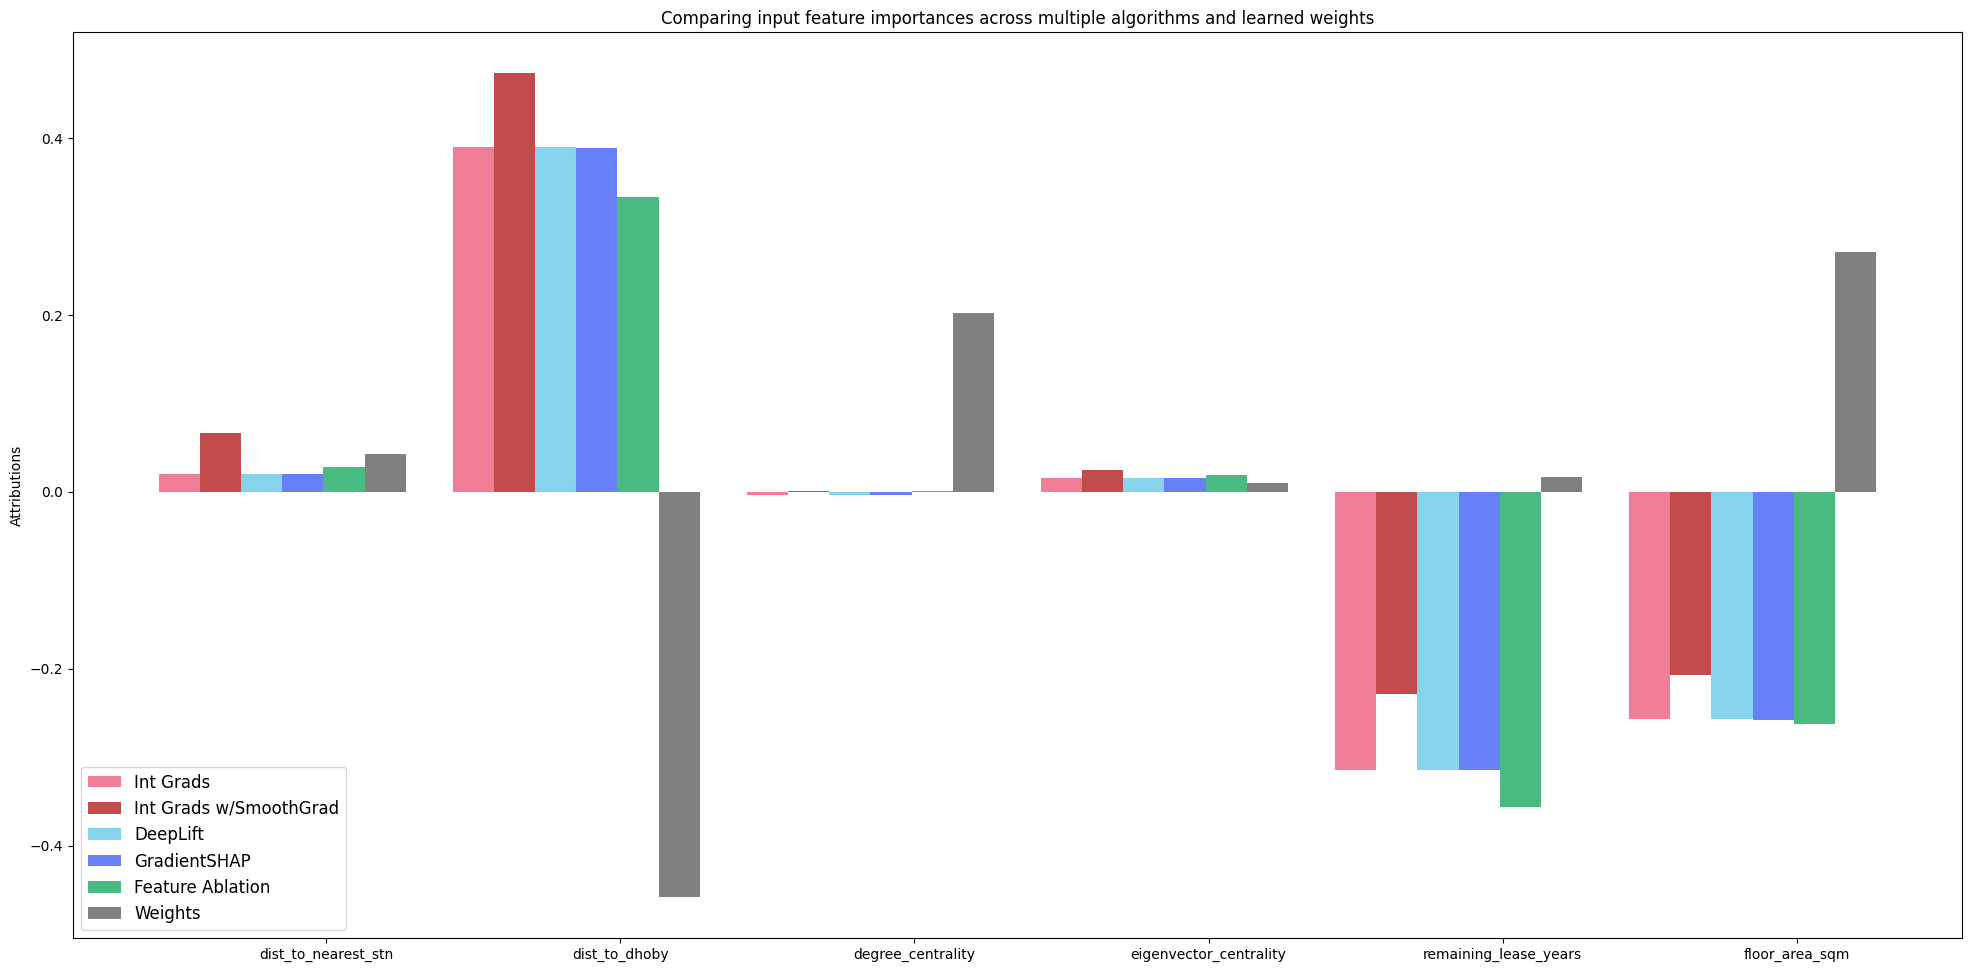

In [23]:
# Initialize attribution methods
from captum.attr import DeepLift
import matplotlib.pyplot as plt

input_x_gradient = InputXGradient(model)
ig = IntegratedGradients(model)
dl = DeepLift(model)
gs = GradientShap(model)
fa = FeatureAblation(model)

# Select first 1000 samples from test set
X_test_subset = X_test_tensor[:1000]
y_test_subset = y_test_tensor[:1000]

baseline_dist = torch.zeros_like(X_test_subset)
input_x_gradient_attr_test = input_x_gradient.attribute(X_test_subset)
ig_attr_test = ig.attribute(X_test_subset, n_steps=50)
dl_attr_test = dl.attribute(X_test_subset)
gs_attr_test = gs.attribute(X_test_subset, baseline_dist)
fa_attr_test = fa.attribute(X_test_subset)

x_axis_data = np.arange(X_test.shape[1])
x_axis_data_labels = list(map(lambda idx: continuous_cols[idx], x_axis_data))

ig_attr_test_sum = ig_attr_test.detach().numpy().sum(0)
ig_attr_test_norm_sum = ig_attr_test_sum / np.linalg.norm(ig_attr_test_sum, ord=1)

input_x_gradient_attr_test_sum = input_x_gradient_attr_test.detach().numpy().sum(0)
input_x_gradient_attr_test_norm_sum = input_x_gradient_attr_test_sum / np.linalg.norm(input_x_gradient_attr_test_sum, ord=1)

dl_attr_test_sum = dl_attr_test.detach().numpy().sum(0)
dl_attr_test_norm_sum = dl_attr_test_sum / np.linalg.norm(dl_attr_test_sum, ord=1)

gs_attr_test_sum = gs_attr_test.detach().numpy().sum(0)
gs_attr_test_norm_sum = gs_attr_test_sum / np.linalg.norm(gs_attr_test_sum, ord=1)

fa_attr_test_sum = fa_attr_test.detach().numpy().sum(0)
fa_attr_test_norm_sum = fa_attr_test_sum / np.linalg.norm(fa_attr_test_sum, ord=1)

lin_weight = model.lin1.weight[0].detach().numpy()
y_axis_lin_weight = lin_weight / np.linalg.norm(lin_weight, ord=1)

width = 0.14
legends = ['Int Grads', 'Int Grads w/SmoothGrad','DeepLift', 'GradientSHAP', 'Feature Ablation', 'Weights']

plt.figure(figsize=(20, 10))

ax = plt.subplot()
ax.set_title('Comparing input feature importances across multiple algorithms and learned weights')
ax.set_ylabel('Attributions')

FONT_SIZE = 16
plt.rc('font', size=FONT_SIZE)            # fontsize of the text sizes
plt.rc('axes', titlesize=FONT_SIZE)       # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)       # fontsize of the x and y labels
plt.rc('legend', fontsize=FONT_SIZE - 4)  # fontsize of the legend

ax.bar(x_axis_data, ig_attr_test_norm_sum, width, align='center', alpha=0.8, color='#eb5e7c')
ax.bar(x_axis_data + width, input_x_gradient_attr_test_norm_sum, width, align='center', alpha=0.7, color='#A90000')
ax.bar(x_axis_data + 2 * width, dl_attr_test_norm_sum, width, align='center', alpha=0.6, color='#34b8e0')
ax.bar(x_axis_data + 3 * width, gs_attr_test_norm_sum, width, align='center',  alpha=0.8, color='#4260f5')
ax.bar(x_axis_data + 4 * width, fa_attr_test_norm_sum, width, align='center', alpha=1.0, color='#49ba81')
ax.bar(x_axis_data + 5 * width, y_axis_lin_weight, width, align='center', alpha=1.0, color='grey')
ax.autoscale_view()
plt.tight_layout()

ax.set_xticks(x_axis_data + 0.5)
ax.set_xticklabels(x_axis_data_labels)

plt.legend(legends, loc=3)
plt.show()

> Read the following [descriptions](https://captum.ai/docs/attribution_algorithms) and [comparisons](https://captum.ai/docs/algorithms_comparison_matrix) in Captum to build up your understanding of the difference of various explainability algorithms. Based on your plot, identify the three most important features for regression. Explain how each of these features influences the regression outcome.


\# TODO: \
I would say that from the image/plot above we can see the top 3 most important features being
1. dist_to_dhoby (highest positive attribution across all methods)
2. remaining_lease_years (strong negative attribution across all methods)
3. floor_area_sqm (moderate negative attribution across most methods)

The above features do affect the regression outcome of "resale prices". In the example of dist_to_dhoby, given that dhoby is a central area, the proximity to public transport enhances convenience and assessibility, making the property more sought after.

For remaining lease years, as there is lesser years left, the property value would be lower since there is lesser "value" for what potential homeowners would be paying.

Lastly, the floor_area_sqm having lower value would mean a smaller property hence lower resale price.

Part B, Q4 (10 marks)
---

Model degradation is a common issue faced when deploying machine learning models (including neural networks) in the real world. New data points could exhibit a different pattern from older data points due to factors such as changes in government policy or market sentiments. For instance, housing prices in Singapore have been increasing and the Singapore government has introduced 3 rounds of cooling measures over the past years (16 December 2021, 30 September 2022, 27 April 2023).

In such situations, the distribution of the new data points could differ from the original data distribution which the models were trained on. Recall that machine learning models often work with the assumption that the test distribution should be similar to train distribution. When this assumption is violated, model performance will be adversely impacted.  In the last part of this assignment, we will investigate to what extent model degradation has occurred.




---



In [ ]:
# !pip install alibi-detect

In [24]:
from alibi_detect.cd import TabularDrift

> Evaluate your model from B1 on data from year 2022 and report the test R2.

In [25]:
# TODO: Enter your code here
from sklearn.metrics import r2_score, root_mean_squared_error

df = pd.read_csv('hdb_price_prediction.csv')
test_data = df[df['year'] == 2022]
result = tabular_model.evaluate(test_data)
pred_df = tabular_model.predict(test_data)

# Extract predicted values
predicted = torch.tensor(pred_df["resale_price_prediction"].values)

# Extract ground truth values
actual = torch.tensor(test_data["resale_price"].values)

# Compute R2 score and RMSE
rmse = root_mean_squared_error(predicted,actual)
# rmse = math.sqrt(result[0]['test_mean_squared_error'])
r2 = r2_score(predicted, actual)
print("RMSE:", rmse)
print("R2 Score:", r2)


c:\Users\Alan Wong\Desktop\Assignment\2025_NNDL_IndivAssignment\.venv\Lib\site-packages\pytorch_tabular\categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
c:\Users\Alan Wong\Desktop\Assignment\2025_NNDL_IndivAssignment\.venv\Lib\site-packages\pytorch_tabular\categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. T

Output()

c:\Users\Alan Wong\Desktop\Assignment\2025_NNDL_IndivAssignment\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │       19127875584.0       │
│  test_mean_squared_error  │       19127875584.0       │
└───────────────────────────┴───────────────────────────┘

c:\Users\Alan Wong\Desktop\Assignment\2025_NNDL_IndivAssignment\.venv\Lib\site-packages\pytorch_tabular\tabular_model.py:1466: DeprecationWarning: `include_input_features` will be deprecated in the next release. Please add index columns to the test dataframe if you want to retain some features like the key or id
  warnings.warn(
c:\Users\Alan Wong\Desktop\Assignment\2025_NNDL_IndivAssignment\.venv\Lib\site-packages\pytorch_tabular\categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(s

RMSE: 138303.56159973293
R2 Score: 0.09913872511564703


> Evaluate your model from B1 on data from year 2023 and report the test R2.

In [26]:
# TODO: Enter your code here
from sklearn.metrics import r2_score, root_mean_squared_error

df = pd.read_csv('hdb_price_prediction.csv')
test_data = df[df['year'] == 2023]
result = tabular_model.evaluate(test_data)
pred_df = tabular_model.predict(test_data)

# Extract predicted values
predicted = torch.tensor(pred_df["resale_price_prediction"].values)

# Extract ground truth values
actual = torch.tensor(test_data["resale_price"].values)

# Compute R2 score and RMSE
rmse = root_mean_squared_error(predicted,actual)
# rmse = math.sqrt(result[0]['test_mean_squared_error'])
r2 = r2_score(predicted, actual)
print("RMSE:", rmse)
print("R2 Score:", r2)



c:\Users\Alan Wong\Desktop\Assignment\2025_NNDL_IndivAssignment\.venv\Lib\site-packages\pytorch_tabular\categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
c:\Users\Alan Wong\Desktop\Assignment\2025_NNDL_IndivAssignment\.venv\Lib\site-packages\pytorch_tabular\categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. T

Output()

c:\Users\Alan Wong\Desktop\Assignment\2025_NNDL_IndivAssignment\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │       29402966016.0       │
│  test_mean_squared_error  │       29402966016.0       │
└───────────────────────────┴───────────────────────────┘

c:\Users\Alan Wong\Desktop\Assignment\2025_NNDL_IndivAssignment\.venv\Lib\site-packages\pytorch_tabular\tabular_model.py:1466: DeprecationWarning: `include_input_features` will be deprecated in the next release. Please add index columns to the test dataframe if you want to retain some features like the key or id
  warnings.warn(
c:\Users\Alan Wong\Desktop\Assignment\2025_NNDL_IndivAssignment\.venv\Lib\site-packages\pytorch_tabular\categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(s

RMSE: 171472.94516305818
R2 Score: -0.550955929813961


> Did model degradation occur for the deep learning model?

\# TODO: \
Yes, the results are below.\
2022\
RMSE: 138303.56159973293\
R2 Score: 0.09913872511564703\
\
2023\
RMSE: 171472.94516305818\
R2 Score: -0.550955929813961

As seen from the R2 Score, the value has dropped greatly. The R2 score measures how well a regression model explains the variance in the dependent variable, and a negative value means that the model performs worse than a simple mean-based prediction.\
Having a score of about 0.099, means that it explains about 9.9% of the variance in the dependent variables, while low, it still suggests that the model has some explanatory power, whereas for -0.551, it suggests that the model could have incorrect assumptions.

Model degradation could be caused by [various data distribution shifts](https://huyenchip.com/2022/02/07/data-distribution-shifts-and-monitoring.html#data-shift-types): covariate shift (features), label shift and/or concept drift (altered relationship between features and labels).
There are various conflicting terminologies in the [literature](https://www.sciencedirect.com/science/article/pii/S0950705122002854#tbl1). Let’s stick to this reference for this assignment.

> Using the **Alibi Detect** library, apply the **TabularDrift** function with the training data (year 2020 and before) used as the reference and **detect which features have drifted** in the 2023 test dataset. Before running the statistical tests, ensure you **sample 1000 data points** each from the train and test data. Do not use the whole train/test data. (Hint: use this example as a guide https://docs.seldon.io/projects/alibi-detect/en/stable/examples/cd_chi2ks_adult.html)


In [27]:
# TODO: Enter your code here
import matplotlib.pyplot as plt
import numpy as np

from alibi_detect.cd import ChiSquareDrift, TabularDrift
from alibi_detect.saving import save_detector, load_detector
df = pd.read_csv('hdb_price_prediction.csv')

train_data = df[df['year'] <= 2020]
X, y = train_data.drop(columns=["resale_price"]), train_data["resale_price"]

feature_names = X.columns.tolist()
print(feature_names)
categorical_cols=["month", "town", "flat_model_type", "storey_range", "year",
"full_address", "nearest_stn"]
print(X.shape, y.shape)

# Create category_map dictionary
category_map = {X.columns.get_loc(col): X[col].unique().tolist() for col in categorical_cols if col in X.columns}

# Output the category_map
print(category_map)


n_ref = 1000
n_test = 1000

X_ref, X_t0, X_t1 = X[:n_ref], X[n_ref:n_ref + n_test], X[n_ref + n_test:n_ref + 2 * n_test]
X_ref.shape, X_t0.shape, X_t1.shape

['month', 'year', 'town', 'full_address', 'nearest_stn', 'dist_to_nearest_stn', 'dist_to_dhoby', 'degree_centrality', 'eigenvector_centrality', 'flat_model_type', 'remaining_lease_years', 'floor_area_sqm', 'storey_range']
(87370, 13) (87370,)
{0: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 2: ['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH', 'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST', 'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL', 'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN'], 9: ['2 ROOM, Improved', '3 ROOM, New Generation', '4 ROOM, New Generation', '4 ROOM, DBSS', '5 ROOM, Standard', '5 ROOM, Improved', '5 ROOM, DBSS', 'EXECUTIVE, Apartment', '3 ROOM, Improved', '3 ROOM, Simplified', '3 ROOM, Model A', '4 ROOM, Simplified', '4 ROOM, Improved', '4 ROOM, Model A', '4 ROOM, Premium Apartment', '5 ROOM, Adjoined flat', '5 ROOM

((1000, 13), (1000, 13), (1000, 13))

In [28]:
categories_per_feature = {}

i = 0
for column in X:
    if column in categorical_cols:
        categories_per_feature[i] = None
    i += 1

# print((categories_per_feature))
# print(type(X_ref.values))

cd = TabularDrift(X_ref.values, p_val=.05, categories_per_feature=categories_per_feature)

# print("Shape of X_ref:", X_ref.values.shape)
# print("Shape of X_t0:", X_t0.values.shape)

# print("Categorical feature indices:", cd.cat_vars)
# print("Number of columns in X_t0:", X_t0.values.shape[1])

preds = cd.predict(X_t0.values)
labels = ['No!', 'Yes!']
print('Drift? {}'.format(labels[preds['data']['is_drift']]))


Drift? Yes!


In [29]:
for f in range(cd.n_features):
    stat = 'Chi2' if f in list(categories_per_feature.keys()) else 'K-S'
    fname = feature_names[f]
    stat_val, p_val = preds['data']['distance'][f], preds['data']['p_val'][f]
    print(f'{fname} -- {stat} {stat_val:.3f} -- p-value {p_val:.3f}')

month -- Chi2 1397.961 -- p-value 0.000
year -- Chi2 0.000 -- p-value 1.000
town -- Chi2 260.002 -- p-value 0.000
full_address -- Chi2 1728.800 -- p-value 0.245
nearest_stn -- Chi2 296.373 -- p-value 0.000
dist_to_nearest_stn -- K-S 0.066 -- p-value 0.024
dist_to_dhoby -- K-S 0.069 -- p-value 0.016
degree_centrality -- K-S 0.029 -- p-value 0.783
eigenvector_centrality -- K-S 0.076 -- p-value 0.006
flat_model_type -- Chi2 33.994 -- p-value 0.281
remaining_lease_years -- K-S 0.068 -- p-value 0.019
floor_area_sqm -- K-S 0.049 -- p-value 0.175
storey_range -- Chi2 18.917 -- p-value 0.168


In [30]:
fpreds = cd.predict(X_t0.values, drift_type='feature')

In [31]:
for f in range(cd.n_features):
    stat = 'Chi2' if f in list(categories_per_feature.keys()) else 'K-S'
    fname = feature_names[f]
    is_drift = fpreds['data']['is_drift'][f]
    stat_val, p_val = fpreds['data']['distance'][f], fpreds['data']['p_val'][f]
    print(f'{fname} -- Drift? {labels[is_drift]} -- {stat} {stat_val:.3f} -- p-value {p_val:.3f}')

month -- Drift? Yes! -- Chi2 1397.961 -- p-value 0.000
year -- Drift? No! -- Chi2 0.000 -- p-value 1.000
town -- Drift? Yes! -- Chi2 260.002 -- p-value 0.000
full_address -- Drift? No! -- Chi2 1728.800 -- p-value 0.245
nearest_stn -- Drift? Yes! -- Chi2 296.373 -- p-value 0.000
dist_to_nearest_stn -- Drift? Yes! -- K-S 0.066 -- p-value 0.024
dist_to_dhoby -- Drift? Yes! -- K-S 0.069 -- p-value 0.016
degree_centrality -- Drift? No! -- K-S 0.029 -- p-value 0.783
eigenvector_centrality -- Drift? Yes! -- K-S 0.076 -- p-value 0.006
flat_model_type -- Drift? No! -- Chi2 33.994 -- p-value 0.281
remaining_lease_years -- Drift? Yes! -- K-S 0.068 -- p-value 0.019
floor_area_sqm -- Drift? No! -- K-S 0.049 -- p-value 0.175
storey_range -- Drift? No! -- Chi2 18.917 -- p-value 0.168


> Assuming that the flurry of housing measures have made an impact on the relationship between all the features and resale_price (i.e. P(Y|X) changes), which type of data distribution shift possibly led to model degradation?

\# TODO:

For categorical features Chi-Square with a significant p-value indicates that the distribution of categories in the feature has changed. Drift in these features suggests a change in category proportions or distributional shifts in discrete values.

On the other hand, for numerical features, it suggests a shift in the range, spread, or shape of the distribution.

Changes in categorical distributions may affect how the model interprets location-based or time-based patterns. While shifts in numerical distributions (dist_to_nearest_stn or dist_to_dhoby) may impact how distance-related features are used for predictions.


> From your analysis via TabularDrift, which features contribute to this shift?

\# TODO: \
From the above, we can see a few key variables that have drifted.
1. month
2. town
3. nearest_stn
4. dist_to_nearest_stn
5. dist_to_dhoby
6. eigenvector_centrality
7. remaining_lease_years

From these variables, it would be easier to visualize the data and understand how the distribution has shifted

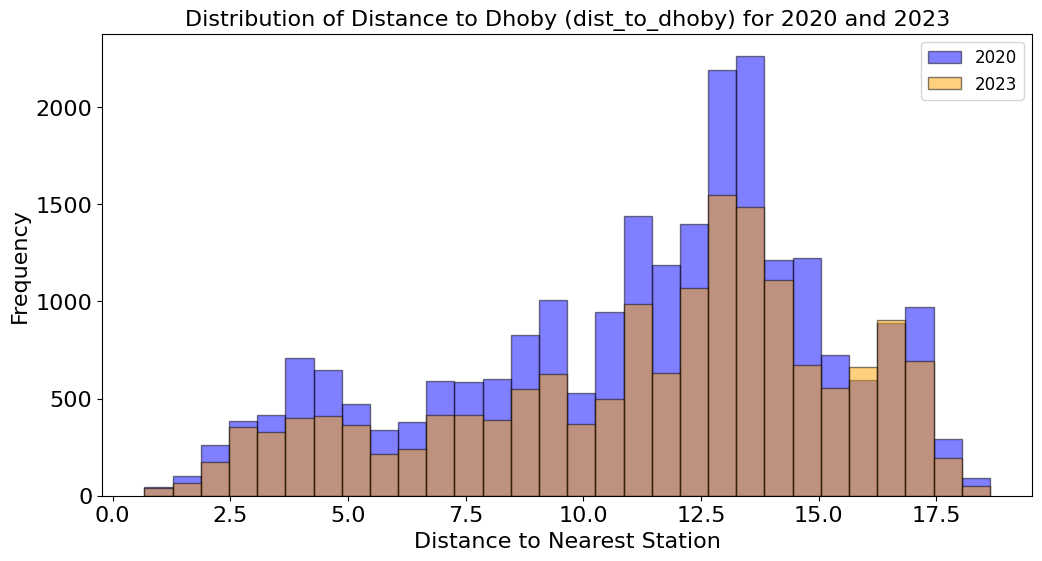

In [36]:
df = pd.read_csv('hdb_price_prediction.csv')

# Filter data for the years 2020 and 2023
data_2020 = df[df['year'] == 2020]
data_2023 = df[df['year'] == 2023]

# Extract 'dist_to_nearest_stn' for both years
dist_to_dhoby_2020 = data_2020['dist_to_dhoby']
dist_to_dhoby_2023 = data_2023['dist_to_dhoby']

# Plot the distributions
plt.figure(figsize=(12, 6))
plt.hist(dist_to_dhoby_2020, bins=30, alpha=0.5, label='2020', color='blue', edgecolor='black')
plt.hist(dist_to_dhoby_2023, bins=30, alpha=0.5, label='2023', color='orange', edgecolor='black')
plt.title('Distribution of Distance to Dhoby (dist_to_dhoby) for 2020 and 2023')
plt.xlabel('Distance to Nearest Station')
plt.ylabel('Frequency')
plt.legend()
plt.show()

> Suggest 1 way to address model degradation and implement it, showing improved test R2 for year 2023.

\# TODO: \
Train the model by using data from 2023, so that the model will learn better given the shifts in policies that have affected the distribution.

In [33]:
# TODO: Enter your code here
df = pd.read_csv('hdb_price_prediction.csv')
test_data = df[df['year'] == 2023]

In [34]:

data_config = DataConfig(
    target=["resale_price"],
    continuous_cols=["dist_to_nearest_stn", "dist_to_dhoby",
"degree_centrality", "eigenvector_centrality", "remaining_lease_years",
"floor_area_sqm"],
    categorical_cols=["month", "town", "flat_model_type", "storey_range"],
    continuous_feature_transform="quantile_normal",
    normalize_continuous_features=True,
)

trainer_config = TrainerConfig(
    auto_lr_find=True,
    batch_size=1024,
    max_epochs=50,
    accelerator="auto",  # can be 'cpu','gpu', 'tpu', or 'ipu'
    devices=-1,
)

model_config = CategoryEmbeddingModelConfig(
    task="regression",
    layers="50",  # Number of nodes in each layer
    # target_range = [(train_data["resale_price"].min() * 0.8, train_data["resale_price"].max() * 1.2)]
)

optimizer_config = OptimizerConfig() # Default is Adam

tabular_model = TabularModel(
    data_config=data_config,
    trainer_config=trainer_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
)

2025-03-13 12:33:50,420 - {pytorch_tabular.tabular_model:146} - INFO - Experiment Tracking is turned off

In [35]:
tabular_model.fit(train=df)

Seed set to 42


2025-03-13 12:33:52,086 - {pytorch_tabular.tabular_model:548} - INFO - Preparing the DataLoaders

2025-03-13 12:33:52,164 - {pytorch_tabular.tabular_datamodule:522} - INFO - Setting up the datamodule for          
regression task

c:\Users\Alan Wong\Desktop\Assignment\2025_NNDL_IndivAssignment\.venv\Lib\site-packages\pytorch_tabular\categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
c:\Users\Alan Wong\Desktop\Assignment\2025_NNDL_IndivAssignment\.venv\Lib\site-packages\pytorch_tabular\categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. T

2025-03-13 12:33:52,505 - {pytorch_tabular.tabular_model:599} - INFO - Preparing the Model: CategoryEmbeddingModel

2025-03-13 12:33:52,559 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-03-13 12:33:52,582 - {pytorch_tabular.tabular_model:656} - INFO - Auto LR Find Started

c:\Users\Alan Wong\Desktop\Assignment\2025_NNDL_IndivAssignment\.venv\Lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:654: Checkpoint directory C:\Users\Alan Wong\Desktop\Assignment\2025_NNDL_IndivAssignment\saved_models exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\Alan Wong\Desktop\Assignment\2025_NNDL_IndivAssignment\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\Users\Alan Wong\Desktop\Assignment\2025_NNDL_IndivAssignment\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performan

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.5754399373371567
Restoring states from the checkpoint path at c:\Users\Alan Wong\Desktop\Assignment\2025_NNDL_IndivAssignment\.lr_find_6dcad6d7-c920-4f67-8e17-ebc72db2c1d3.ckpt
Restored all states from the checkpoint at c:\Users\Alan Wong\Desktop\Assignment\2025_NNDL_IndivAssignment\.lr_find_6dcad6d7-c920-4f67-8e17-ebc72db2c1d3.ckpt


2025-03-13 12:33:55,603 - {pytorch_tabular.tabular_model:669} - INFO - Suggested LR: 0.5754399373371567. For plot  
and detailed analysis, use `find_learning_rate` method.

2025-03-13 12:33:55,606 - {pytorch_tabular.tabular_model:678} - INFO - Training Started

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  3.0 K │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer          │  1.7 K │ train │
│ 2 │ head             │ LinearHead                │     51 │ train │
│ 3 │ loss             │ MSELoss                   │      0 │ train │
└───┴──────────────────┴───────────────────────────┴────────┴───────┘

Trainable params: 4.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 4.7 K                                                                                                
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 16                                                                                          
Modules in eval mode: 0

Output()

2025-03-13 12:34:15,798 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

2025-03-13 12:34:15,801 - {pytorch_tabular.tabular_model:1529} - INFO - Loading the best model

UnpicklingError: Weights only load failed. This file can still be loaded, to do so you have two options, [1mdo those steps only if you trust the source of the checkpoint[0m. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL omegaconf.dictconfig.DictConfig was not an allowed global by default. Please use `torch.serialization.add_safe_globals([DictConfig])` or the `torch.serialization.safe_globals([DictConfig])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to learn more about types accepted by default with weights_only https://pytorch.org/docs/stable/generated/torch.load.html.

In [37]:
result = tabular_model.evaluate(test_data)
pred_df = tabular_model.predict(test_data)
pred_df.head()

c:\Users\Alan Wong\Desktop\Assignment\2025_NNDL_IndivAssignment\.venv\Lib\site-packages\pytorch_tabular\categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
c:\Users\Alan Wong\Desktop\Assignment\2025_NNDL_IndivAssignment\.venv\Lib\site-packages\pytorch_tabular\categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. T

Output()

c:\Users\Alan Wong\Desktop\Assignment\2025_NNDL_IndivAssignment\.venv\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │       12295891968.0       │
│  test_mean_squared_error  │       12295891968.0       │
└───────────────────────────┴───────────────────────────┘

c:\Users\Alan Wong\Desktop\Assignment\2025_NNDL_IndivAssignment\.venv\Lib\site-packages\pytorch_tabular\tabular_model.py:1466: DeprecationWarning: `include_input_features` will be deprecated in the next release. Please add index columns to the test dataframe if you want to retain some features like the key or id
  warnings.warn(
c:\Users\Alan Wong\Desktop\Assignment\2025_NNDL_IndivAssignment\.venv\Lib\site-packages\pytorch_tabular\categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(s

,resale_price_prediction
143129,155824.406250
143130,225585.093750
143131,195331.578125
143132,209966.187500
143133,170486.062500


In [38]:
# Extract predicted values
predicted = torch.tensor(pred_df["resale_price_prediction"].values)

# Extract ground truth values
actual = torch.tensor(test_data["resale_price"].values)

print(predicted)
print(actual)
# Compute R2 score and RMSE
rmse = root_mean_squared_error(predicted,actual)
# rmse = math.sqrt(result[0]['test_mean_squared_error'])
r2 = r2_score(predicted, actual)
print("RMSE:", rmse)
print("R2 Score:", r2)

tensor([155824.4062, 225585.0938, 195331.5781,  ..., 675507.5625,
        624461.6250, 629454.0625])
tensor([267000., 300000., 280000.,  ..., 788888., 822800., 785000.],
       dtype=torch.float64)
RMSE: 110886.8442942195
R2 Score: 0.44268057548837814


We can see that the final results have drastically improved.\
RMSE: 110886.8442942195\
R2 Score: 0.44268057548837814